---
# Session 3

---

# Example a classification with MNIST dataset

## Task: Create a simple CNN model

Create a CNN for training grayscale image of size 28 x 28 pixels, with :


*   One 2D convolutionnal layer with 16 filters
*   One 2D convolutionnal layer with 32 filters
*   One MaxPooling layer with stride=2 and kernel=2
*   One Dense layer of 128 neurons
*   One Dense layer of 64 neurons
*   One ouput layer with 10 output





In [ ]:
import numpy as np # Import the numpy library for numerical operations

import torch # Import the PyTorch library
from torch import nn # Import the neural network module from PyTorch

# Import torchvision
import torchvision # Import the torchvision library, which provides access to datasets, models, and image transformations
from torchvision import datasets # Import the datasets module from torchvision, which contains standard datasets like MNIST
from torchvision.transforms import ToTensor, transforms # Import the ToTensor transform to convert PIL Images to PyTorch Tensors
from torch.utils.data import Subset

# Import matplotlib for visualization
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module for creating plots and visualizations

In [ ]:
class SimpleCNN(nn.Module):
    '''
    class SimpleCNN(nn.Module): This line defines a new class SimpleCNN that inherits
    from nn.Module. In PyTorch, nn.Module is the base class for all neural network modules.
    Any custom neural network or layer must subclass nn.Module. This provides
    the basic functionality for tracking parameters, submodules, and moving
    data through the network.
    '''

    def __init__(self):
        '''
        This is the constructor method for the SimpleCNN class.
        When you create an instance of SimpleCNN (e.g., model = SimpleCNN()),
        this method is called. It's where you define all the layers (or sub-modules)
        that your neural network will use.
        '''
        super(SimpleCNN, self).__init__()
        '''
        This line calls the constructor of the parent class (nn.Module).
        It's crucial for proper initialization of the PyTorch module system.
        '''
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        '''
        nn.Conv2d: This creates a 2D convolutional layer. Convolutional layers are
        fundamental to CNNs as they learn hierarchical features from spatial data like images.
        They do this by applying a small filter (or kernel) across the input image

        in_channels=1: Indicates the input is a single-channel image (like grayscale).
        If it were an RGB image, in_channels would be 3. The input tensor for this layer
        would have a shape (Batch_Size, 1, Height, Width).

        out_channels=16: This layer will produce 16 different "feature maps."
        Each feature map is the result of a unique 3x3 filter sliding across the input.
        The output tensor will have a shape (Batch_Size, 16, New_Height, New_Width).

        The choice of 16 for out_channels is a design decision made by the person creating
        the neural network, not a value mathematically derived from the MNIST dataset itself.
        In summary, 16 is a hyperparameter chosen to provide sufficient learning capacity for
        the initial feature extraction on MNIST images without being excessively complex or
        computationally expensive. It's a common practice based on empirical success in similar
        image classification tasks.

        kernel_size=3: The filter (or kernel) that slides over the image is a
        3x3 matrix of learnable weights. This small size allows it to detect local patterns.

        padding=1: A padding of 1 pixel is added around the input image. This is
        often used to ensure that the spatial dimensions (height and width) of the output feature
        maps remain the same as the input when stride=1 and kernel_size is odd (like 3). Without
        padding, the output dimensions would shrink with each convolution.

        The output spatial dimension formula for nn.Conv2d is:
        Output_Dim = floor((Input_Dim - Kernel_Size + 2 * Padding) / Stride) + 1
        If Input_Dim = H, Kernel_Size = 3, Padding = 1, Stride = 1, then Output_Dim = floor((H - 3 + 2*1) / 1) + 1 = floor(H - 1) + 1 = H.
        '''
        self.relu1 = nn.ReLU()
        '''
        ReLU (Rectified Linear Unit) is an activation function. It introduces non-linearity into the network. Without non-linearities,
        a deep network would just be a series of linear transformations, equivalent to a single linear transformation, limiting its
        ability to learn complex patterns.
        '''
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        '''
        This is the second convolutional layer. It takes the 16 feature maps from conv1 as its input channels and learns 32 new filters to
        produce 32 output feature maps. It extracts higher-level features based on the features detected by conv1.

        self.conv2 acts as a feature extractor that builds upon the simpler features learned by self.conv1. It takes the 16 feature maps
        from conv1 as its input and learns to combine them into 32 new, more complex feature maps, which are then passed on to subsequent
        layers for further processing (in this case, pooling).
        '''
        # ReLU activation function after the second convolution.
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        '''
        nn.MaxPool2d: This specifically creates a 2D max pooling operation. It slides a window (defined by kernel_size) over the input
        feature map and, for each window, outputs the maximum value within that window.

        kernel_size=2:This defines the size of the window (or filter) that slides over the feature map. In this case, it's a 2x2 window.
        The pooling operation will consider every 2x2 block of pixels and select the largest value from that block.For a given 2x2 input
        patch, only the maximum of the four values is retained.

        stride=2:This defines how many pixels the pooling window moves at each step. A stride of 2 means that after processing one 2x2
        block, the window shifts 2 pixels horizontally, and then 2 pixels vertically for the next row. Since the stride equals the kernel
        size, the pooling windows are non-overlapping.

        Because the stride is 2, and kernel_size is 2, the spatial dimensions (height and width) of the input feature map will be halved.

        the tensor shape after self.pool will be [Batch_Size, 32, 14, 14]
        '''

        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        '''
        This line defines the first fully connected (FC) layer, also known as a dense layer. Fully connected layers are typically used at the end
        of a CNN after the convolutional and pooling layers have extracted and summarized high-level features from the input image. Their purpose
        is to perform classification (or regression) based on these extracted features.

        nn.Linear:This creates a linear transformation, which is the core operation of a fully connected layer. Mathematically, it performs a matrix
        multiplication of the input vector with a weight matrix, and then adds a bias vector.
        '''

        self.fc2 = nn.Linear(128, 64)
        '''
        self.fc2 takes the 128 abstract features from the first fully connected layer and transforms them into an even more compressed, 64-element feature vector.
        This 64-element vector represents a refined summary of the input image's characteristics, which is then passed to the final output layer for making
        the classification decision. It acts as an additional hidden layer that refines the features before the final classification step.

        nn.Linear: As before, this signifies a standard fully connected (or dense) layer, performing a linear transformation on its input.

        128 (Input Features):This layer expects 128 input features (neurons). This number directly corresponds to the out_features of the
        preceding self.fc1 layer. It means that self.fc2 takes the 128 high-level features generated by self.fc1 as its input.
        The input tensor to self.fc2 will have a shape [Batch_Size, 128].
        64 (Output Features):This defines the number of output features (neurons) that this layer will produce. This is another hyperparameter
        chosen by the model designer. This layer further reduces the dimensionality of the feature representation from 128 down to 64. This
        compression can help in learning more robust and discriminative features, and also reduces the number of parameters for the final output layer.
        The output tensor from self.fc2 will have a shape [Batch_Size, 64].
        '''

        # Output layer, a fully connected layer with 64 input features and 10 output features (for 10 classes in MNIST).
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # Define the forward pass of the network.
        # Input x is the image tensor.
        x = self.conv1(x) # Apply the first convolution.
        x = self.relu1(x) # Apply the first ReLU activation.
        x = self.conv2(x) # Apply the second convolution.
        x = self.relu2(x) # Apply the second ReLU activation.
        x = self.pool(x) # Apply the Max pooling layer.  Size:: [Batch_Size, 32, 14, 14]
        x = torch.flatten(x, 1)
        '''
        We previously determined that the output of the self.pool layer has a shape of [Batch_Size, 32, 14, 14].
        torch.flatten(x, 1) (which you have in your forward method) takes this 3D tensor (excluding the batch dimension) and reshapes it into a 1D vector.
        Therefore, the number of elements in this flattened vector for each image is 32 channels * 14 height * 14 width = 6272.
        This 6272 is the exact number of input features (in_features) for this nn.Linear layer.
        '''
        x = self.fc1(x) # Apply the first fully connected layer.
        x = self.fc2(x) # Apply the second fully connected layer.
        return self.out(x) # Apply the output layer and return the final output (raw scores for each class).


In [ ]:
#!pip install torchviz
#!pip install torchinfo


In [ ]:
from torchinfo import summary
# Setup model and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

#  Print detailed model summary
print(summary(
    model,
    input_size=(1, 1, 28, 28),     # Batch size 1, 1 channel, 28x28 input
    col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
    col_width=28,
    row_settings=["depth", "var_names"],
    device=device.type,
    verbose=2
))

Layer (type (var_name):depth-idx)        Input Shape                  Output Shape                 Param #                      Kernel Shape                 Mult-Adds
SimpleCNN (SimpleCNN)                    [1, 1, 28, 28]               [1, 10]                      --                           --                           --
├─Conv2d (conv1): 1-1                    [1, 1, 28, 28]               [1, 16, 28, 28]              160                          [3, 3]                       125,440
│    └─weight                                                                                      ├─144                        [1, 16, 3, 3]
│    └─bias                                                                                        └─16                         [16]
├─ReLU (relu1): 1-2                      [1, 16, 28, 28]              [1, 16, 28, 28]              --                           --                           --
├─Conv2d (conv2): 1-3                    [1, 16, 28, 28]              [1,

## Load existing datasets : MNIST

MNIST class names: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Number of training samples: 60000
Number of test samples: 10000
Single image shape: torch.Size([1, 28, 28])  --> Format: [Channels, Height, Width]
Label for this image: 5


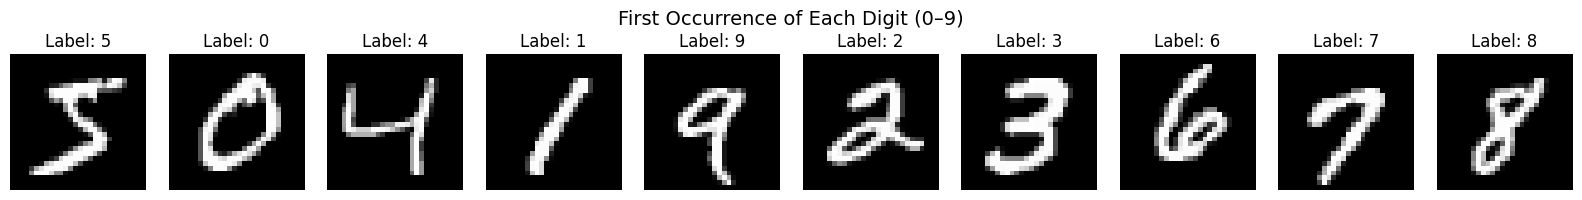

In [ ]:
# 1. Define transformation pipeline for images
transform = transforms.Compose([
    transforms.ToTensor()  # Converts PIL images to PyTorch tensors with values in [0.0, 1.0]
])

# 2. Load the MNIST training dataset
train_data = datasets.MNIST(
    root="data",             # Folder where MNIST will be stored
    train=True,              # Load the training split
    download=True,           # Download if not already present
    transform=transform,     # Apply image transformation (ToTensor)
    target_transform=None    # No transformation on labels
)

# 3. Load the MNIST test dataset
test_data = datasets.MNIST(
    root="data",
    train=False,             # Load the test split
    download=True,
    transform=transform
)

# 4. Class labels in MNIST are digits 0 through 9
class_names = train_data.classes  # This returns: ['0', '1', ..., '9']
print("MNIST class names:", class_names)

# 5. Inspect dataset size and tensor shape
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

# 6. Access and inspect a single training example
image_tensor, label = train_data[0]  # Returns a tuple: (image, label)
print(f"Single image shape: {image_tensor.shape}  --> Format: [Channels, Height, Width]")
print(f"Label for this image: {label}")

# 7. Visualize the first 10 unique digits from 0 to 9
fig, axs = plt.subplots(1, 10, figsize=(16, 2))
fig.suptitle("First Occurrence of Each Digit (0–9)", fontsize=14)

seen_digits = set()
shown = 0

# Loop through the dataset and plot the first instance of each class
for idx, (img, lbl) in enumerate(train_data):
    if lbl not in seen_digits:
        axs[shown].imshow(img.squeeze(), cmap="gray")
        axs[shown].set_title(f"Label: {lbl}")
        axs[shown].axis("off")
        seen_digits.add(lbl)
        shown += 1
    if shown == 10:
        break

plt.tight_layout()
plt.show()


In [ ]:
# Select just a subset
train_data = Subset(train_data, range(1000))
test_data = Subset(test_data, range(250))

### Data Preparation

The DataLoader helps load data into a model for training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches. So it's more computationally efficient it's also gives your model more opportunities to improve.

With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

In [ ]:
from torch.utils.data import DataLoader # Import the DataLoader class from torch.utils.data

# Setup the batch size hyperparameter
BATCH_SIZE = 1024 # Define the number of samples per batch

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # Use the training dataset
    batch_size=BATCH_SIZE, # Set the batch size for the training data
    shuffle=True # Shuffle the data at the beginning of each epoch for better training
)

test_dataloader = DataLoader(test_data, # Use the test dataset
    batch_size=BATCH_SIZE, # Set the batch size for the test data
    shuffle=False # No need to shuffle test data for evaluation
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") # Print the DataLoader objects
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}") # Print the number of batches in the training DataLoader
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}") # Print the number of batches in the test DataLoader

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7bdfac6b7390>, <torch.utils.data.dataloader.DataLoader object at 0x7bdfb1abe210>)
Length of train dataloader: 1 batches of 1024
Length of test dataloader: 1 batches of 1024


In [ ]:
# 1. Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Get one batch
images, labels = next(iter(train_dataloader)) # Get the next batch of images and labels from the training DataLoader

print(images.shape) # Print the shape of the images tensor in the batch (Batch Size, Channels, Height, Width)

torch.Size([1000, 1, 28, 28])


In [ ]:
# Instantiate model :
model = SimpleCNN() # Create an instance of the SimpleCNN model defined earlier

# Predictions
with torch.inference_mode(): # Disable gradient calculation for inference
    for data, labels in test_dataloader : # Iterate through batches in the test DataLoader
        preds = model(data) # Pass the image data through the model to get predictions

preds[0,:] # Print the predictions (logits) for the first image in the last batch

tensor([-0.0639, -0.0029,  0.0459, -0.0932, -0.0105, -0.1311, -0.0503,  0.1015,
         0.1477, -0.0870])

In [ ]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function from scikit-learn
loss_fn = nn.CrossEntropyLoss() # Define the loss function as Cross-Entropy Loss, commonly used for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Define the optimizer as Adam, with a learning rate of 0.01. It will update the model's parameters.


# Training and testing loop
epochs = 10 # Define the number of training epochs
for epoch in range(epochs): # Loop through each epoch
    for X_train, y_train in train_dataloader : # Iterate through batches of training data
        model.train() # Set the model to training mode (enables dropout, batch normalization, etc.)
        outputs = model(X_train) # Perform a forward pass to get model outputs (predictions)
        loss = loss_fn(outputs, y_train) # Calculate the loss between the model outputs and the true labels

        optimizer.zero_grad() # Zero the gradients of the optimizer
        loss.backward() # Perform backpropagation to calculate gradients
        optimizer.step() # Update the model's parameters based on the calculated gradients

    model.eval() # Set the model to evaluation mode (disables dropout, batch normalization, etc.)
    all_preds = [] # Initialize an empty list to store all predictions
    all_labels = [] # Initialize an empty list to store all true labels
    with torch.inference_mode(): # Disable gradient calculation for inference
        for X_test, y_test in test_dataloader: # Iterate through batches of test data
            test_preds = model(X_test) # Perform a forward pass to get model predictions on test data
            test_pred_labels = torch.argmax(test_preds, dim=1) # Get the predicted class label by finding the index of the maximum logit

            all_preds.append(test_pred_labels.cpu()) # Append the predicted labels to the list (move to CPU if on GPU)
            all_labels.append(y_test.cpu()) # Append the true labels to the list (move to CPU if on GPU)

    # Concaténer toutes les prédictions et labels
    all_preds = torch.cat(all_preds) # Concatenate all predicted labels into a single tensor
    all_labels = torch.cat(all_labels) # Concatenate all true labels into a single tensor
    acc = accuracy_score(all_labels, all_preds) # Calculate the accuracy score
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Test Accuracy: {acc:.4f}") # Print the epoch number, training loss, and test accuracy

Epoch 1/10 | Loss: 2.3040 | Test Accuracy: 0.1440
Epoch 2/10 | Loss: 3.8473 | Test Accuracy: 0.1960
Epoch 3/10 | Loss: 3.9307 | Test Accuracy: 0.0560
Epoch 4/10 | Loss: 4.8407 | Test Accuracy: 0.3320
Epoch 5/10 | Loss: 2.4490 | Test Accuracy: 0.5760
Epoch 6/10 | Loss: 1.7328 | Test Accuracy: 0.5200
Epoch 7/10 | Loss: 1.6868 | Test Accuracy: 0.4680
Epoch 8/10 | Loss: 1.5257 | Test Accuracy: 0.5360
Epoch 9/10 | Loss: 1.2527 | Test Accuracy: 0.6640
Epoch 10/10 | Loss: 0.9870 | Test Accuracy: 0.7000


In [ ]:
from torchinfo import summary

# Set batch size
BATCH_SIZE = 1024

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# Print detailed architecture summary with batch size
print(summary(
    model,
    input_size=(BATCH_SIZE, 1, 28, 28),
    col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
    col_width=25,
    row_settings=["depth", "var_names"],
    device=device.type,
    verbose=2
))


Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
SimpleCNN (SimpleCNN)                    [1024, 1, 28, 28]         [1024, 10]                --                        --                        --
├─Conv2d (conv1): 1-1                    [1024, 1, 28, 28]         [1024, 16, 28, 28]        160                       [3, 3]                    128,450,560
│    └─weight                                                                                ├─144                     [1, 16, 3, 3]
│    └─bias                                                                                  └─16                      [16]
├─ReLU (relu1): 1-2                      [1024, 16, 28, 28]        [1024, 16, 28, 28]        --                        --                        --
├─Conv2d (conv2): 1-3                    [1024, 16, 28, 28]        [1024, 32, 28, 28]        4,640                     [3, 3]          

## GPU version: Please make sure you change your run time to GPU

In [ ]:
import torchdf
from torch import nn
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torchvision # Assuming you're using torchvision datasets, if not, adjust train_data/test_data loading

# Define a simple CNN model (assuming you have this defined elsewhere)
# If you don't have this, you'll need to define your SimpleCNN class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 10) # Adjust input features based on your image size (e.g., for 28x28 MNIST)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.fc1(x)
        return x

# 1. Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 2. Load your dataset (example with MNIST, replace with your actual data loading)
# If your data is already in tensor format, skip this and just ensure it's moved to device later
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Setup the batch size hyperparameter
BATCH_SIZE = 1024

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# Get one batch (and move to device for checking)
images, labels = next(iter(train_dataloader))
images, labels = images.to(device), labels.to(device) # Move to device

print(images.shape)

# Instantiate model and move it to the GPU
model = SimpleCNN().to(device) # Move model to the selected device

# Predictions (initial check)
with torch.inference_mode():
    for data, labels_val in test_dataloader : # Renamed labels to labels_val to avoid conflict
        data = data.to(device) # Move data to device
        preds = model(data)
        break # Just get one batch for the check

print("Initial predictions (logits) for the first image in a batch:", preds[0,:])

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training and testing loop
epochs = 10
for epoch in range(epochs):
    # Training
    model.train()
    for X_train, y_train in train_dataloader :
        X_train, y_train = X_train.to(device), y_train.to(device) # Move data to device
        outputs = model(X_train)
        loss = loss_fn(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Testing
    model.eval()
    all_preds = []
    all_labels = []
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device) # Move data to device
            test_preds = model(X_test)
            test_pred_labels = torch.argmax(test_preds, dim=1)

            all_preds.append(test_pred_labels.cpu()) # Move back to CPU for sklearn's accuracy_score
            all_labels.append(y_test.cpu()) # Move back to CPU

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    acc = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Test Accuracy: {acc:.4f}")

ModuleNotFoundError: No module named 'torchdf'